In [1]:
import numpy as np
import scipy.io as io
glacier_component_path='/home/shashank/Shashank_Github_Packages/old_landlab/landlab/landlab/components/glacier/glacier/'
import sys
sys.path.insert(0,glacier_component_path)
#from glacier import glacier
import glacier
from landlab import RasterModelGrid
import os 
from pygeotools.lib import iolib, geolib, malib,warplib
from imview.lib import pltlib
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

In [2]:
datadir = '/media/shashank/Shared_OS_Storage/landlab_directory/'
fn_list = [os.path.join(datadir,'SRTM_DEM_to_be_used.tif'),os.path.join(datadir,'central_himalaya_glabtop2_icethickness_shpclip_trim.tif'),os.path.join(datadir,'dh_dt_ma_gauss_fill_shpclip_trim_shpclip.tif')]
ds_list = warplib.memwarp_multi_fn(fn_list)
ma_list = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 50.0
Extent: [386535.0, 3358734.47889, 421905.0, 3394215.0]
Projection: '+proj=utm +zone=44 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 3: /media/shashank/Shared_OS_Storage/landlab_directory/SRTM_DEM_to_be_used.tif
nl: 710 ns: 707 res: 50.000
2 of 3: /media/shashank/Shared_OS_Storage/landlab_directory/central_himalaya_glabtop2_icethickness_shpclip_trim.tif
nl: 710 ns: 707 res: 50.000
3 of 3: /media/shashank/Shared_OS_Storage/landlab_directory/dh_dt_ma_gauss_fill_shpclip_trim_shpclip.tif
nl: 710 ns: 707 res: 50.000


In [19]:
#converting elevation change in m/yr to mass change in mwe/yr
#Assuming all mass lost in form of ice, thus use a constant density of 850 kg/m3
mass_balance = ma_list[2]*0.85
#converting all the three arrays to normal arrays
#subtracting the ice thickness from DEM elevation to get bed topography
S = ma_list[0].filled(0) #Surface Elevation (m)
ice_thickness = ma_list[1].filled(0) #ice thickness (m)
B = S - ice_thickness #Bed elevation (m)
b_dot = mass_balance.filled(0) #mass balance (m.w.e./yr)


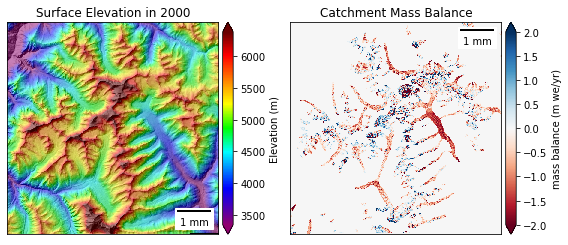

In [17]:
fig,ax = plt.subplots(1,2,figsize=(8,5))
pltlib.iv(ma_list[0],ax=ax[0],ds=ds_list[0],title='Surface Elevation in 2000',label='Elevation (m)',hillshade=True)
pltlib.iv(mass_balance.filled(0),ax=ax[1],ds = ds_list[0],title='Catchment Mass Balance',label='mass balance (m we/yr)',clim = (-2,2),cmap='RdBu')
fig.savefig('Model_input_zero_initial_thickness.png',dpi=600)

In [4]:
def flatten(B,b_dot,S,zero_thickness=True):
    ### flatten two dimensional matrix
    S = S.T.flatten()
    #B[np.isnan(B)] = 0
    if zero_thickness:
        B = S #Bed is forced to be same as Surface elevation
    else:
        B = B.T.flatten() #Bed is changed to surface-ice elevation as already calculated
    b_dot = b_dot.T.flatten()
    return B,b_dot,S

In [5]:
#Model Parameters foir assuming zero initial ice present, ie., S = B
nx = np.shape(ma_list[0])[1]
ny = np.shape(ma_list[0])[0]
dx = ds_list[0].GetGeoTransform()[1]
dt = 0.08333 #years, monthly time steps
t = 0 #years
t_STOP = 100 #years
B,b_dot,S = flatten(B,b_dot,S)
dictionary = {'S':S,'B':B,'b_dot':b_dot,'dt':dt,'t_STOP':t_STOP,'t':t,'dx':dx,'nx':nx,'ny':ny}
grid = RasterModelGrid(nx,ny,dx)

In [6]:
#Run the model
gla = glacier.Glacier(grid,dictionary)
gla.recursive_steps()

BKS: At t=    0.08 yr ALPHA_I=10.07% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    0.17 yr ALPHA_I=10.07% and maxima are: H(298178) = 166.247559 			S(206566)=7803.958496

BKS: At t=    0.25 yr ALPHA_I=10.07% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    0.33 yr ALPHA_I=10.07% and maxima are: H(298178) = 121.205078 			S(206566)=7803.958496

BKS: At t=    0.42 yr ALPHA_I=10.08% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    0.50 yr ALPHA_I=10.07% and maxima are: H(298178) = 124.290527 			S(206566)=7803.958496

BKS: At t=    0.58 yr ALPHA_I=10.08% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    0.67 yr ALPHA_I=10.08% and maxima are: H(298178) = 127.492188 			S(206566)=7803.958496

BKS: At t=    0.75 yr ALPHA_I=10.09% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    0.83 yr ALPHA_I=10.09% and maxima are: H(298178) = 13

BKS: At t=    6.75 yr ALPHA_I=10.52% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    6.83 yr ALPHA_I=10.52% and maxima are: H(298178) = 159.618652 			S(206566)=7803.958496

BKS: At t=    6.92 yr ALPHA_I=10.53% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    7.00 yr ALPHA_I=10.54% and maxima are: H(298178) = 160.023438 			S(206566)=7803.958496

BKS: At t=    7.08 yr ALPHA_I=10.55% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    7.17 yr ALPHA_I=10.55% and maxima are: H(298178) = 160.426270 			S(206566)=7803.958496

BKS: At t=    7.25 yr ALPHA_I=10.56% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    7.33 yr ALPHA_I=10.57% and maxima are: H(298178) = 160.819336 			S(206566)=7803.958496

BKS: At t=    7.42 yr ALPHA_I=10.58% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=    7.50 yr ALPHA_I=10.58% and maxima are: H(298178) = 16

BKS: At t=   13.42 yr ALPHA_I=11.08% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   13.50 yr ALPHA_I=11.08% and maxima are: H(301015) = 178.732422 			S(206566)=7803.958496

BKS: At t=   13.58 yr ALPHA_I=11.09% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   13.67 yr ALPHA_I=11.09% and maxima are: H(301015) = 179.154297 			S(206566)=7803.958496

BKS: At t=   13.75 yr ALPHA_I=11.10% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   13.83 yr ALPHA_I=11.11% and maxima are: H(301015) = 179.568359 			S(206566)=7803.958496

BKS: At t=   13.92 yr ALPHA_I=11.12% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   14.00 yr ALPHA_I=11.13% and maxima are: H(301015) = 179.972656 			S(206566)=7803.958496

BKS: At t=   14.08 yr ALPHA_I=11.14% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   14.17 yr ALPHA_I=11.14% and maxima are: H(301015) = 18

BKS: At t=   20.08 yr ALPHA_I=11.64% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   20.17 yr ALPHA_I=11.64% and maxima are: H(301015) = 190.805664 			S(206566)=7803.958496

BKS: At t=   20.25 yr ALPHA_I=11.65% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   20.33 yr ALPHA_I=11.66% and maxima are: H(301015) = 191.006836 			S(206566)=7803.958496

BKS: At t=   20.42 yr ALPHA_I=11.67% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   20.50 yr ALPHA_I=11.67% and maxima are: H(301015) = 191.208984 			S(206566)=7803.958496

BKS: At t=   20.58 yr ALPHA_I=11.68% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   20.67 yr ALPHA_I=11.68% and maxima are: H(301015) = 191.405273 			S(206566)=7803.958496

BKS: At t=   20.75 yr ALPHA_I=11.70% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   20.83 yr ALPHA_I=11.70% and maxima are: H(301015) = 19

BKS: At t=   26.75 yr ALPHA_I=12.20% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   26.83 yr ALPHA_I=12.20% and maxima are: H(301015) = 196.792480 			S(206566)=7803.958496

BKS: At t=   26.92 yr ALPHA_I=12.22% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   27.00 yr ALPHA_I=12.22% and maxima are: H(301015) = 196.901367 			S(206566)=7803.958496

BKS: At t=   27.08 yr ALPHA_I=12.23% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   27.17 yr ALPHA_I=12.23% and maxima are: H(301015) = 197.006836 			S(206566)=7803.958496

BKS: At t=   27.25 yr ALPHA_I=12.25% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   27.33 yr ALPHA_I=12.24% and maxima are: H(301015) = 197.112305 			S(206566)=7803.958496

BKS: At t=   27.42 yr ALPHA_I=12.25% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   27.50 yr ALPHA_I=12.26% and maxima are: H(301015) = 19

BKS: At t=   33.42 yr ALPHA_I=12.77% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   33.50 yr ALPHA_I=12.77% and maxima are: H(301015) = 200.210938 			S(206566)=7803.958496

BKS: At t=   33.58 yr ALPHA_I=12.78% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   33.67 yr ALPHA_I=12.78% and maxima are: H(301015) = 200.280273 			S(206566)=7803.958496

BKS: At t=   33.75 yr ALPHA_I=12.79% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   33.83 yr ALPHA_I=12.79% and maxima are: H(301015) = 200.348633 			S(206566)=7803.958496

BKS: At t=   33.92 yr ALPHA_I=12.80% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   34.00 yr ALPHA_I=12.80% and maxima are: H(301015) = 200.415039 			S(206566)=7803.958496

BKS: At t=   34.08 yr ALPHA_I=12.81% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   34.17 yr ALPHA_I=12.81% and maxima are: H(301015) = 20

BKS: At t=   40.08 yr ALPHA_I=13.29% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   40.17 yr ALPHA_I=13.29% and maxima are: H(301725) = 202.636719 			S(206566)=7803.958496

BKS: At t=   40.25 yr ALPHA_I=13.30% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   40.33 yr ALPHA_I=13.30% and maxima are: H(301725) = 202.691406 			S(206566)=7803.958496

BKS: At t=   40.42 yr ALPHA_I=13.31% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   40.50 yr ALPHA_I=13.31% and maxima are: H(301725) = 202.742188 			S(206566)=7803.958496

BKS: At t=   40.58 yr ALPHA_I=13.33% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   40.67 yr ALPHA_I=13.33% and maxima are: H(301725) = 202.793457 			S(206566)=7803.958496

BKS: At t=   40.75 yr ALPHA_I=13.34% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   40.83 yr ALPHA_I=13.34% and maxima are: H(301725) = 20

BKS: At t=   46.75 yr ALPHA_I=13.80% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   46.83 yr ALPHA_I=13.79% and maxima are: H(301725) = 204.544434 			S(206566)=7803.958496

BKS: At t=   46.91 yr ALPHA_I=13.80% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   47.00 yr ALPHA_I=13.80% and maxima are: H(301725) = 204.594238 			S(206566)=7803.958496

BKS: At t=   47.08 yr ALPHA_I=13.82% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   47.16 yr ALPHA_I=13.82% and maxima are: H(301725) = 204.634277 			S(206566)=7803.958496

BKS: At t=   47.25 yr ALPHA_I=13.83% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   47.33 yr ALPHA_I=13.83% and maxima are: H(301725) = 204.671387 			S(206566)=7803.958496

BKS: At t=   47.41 yr ALPHA_I=13.84% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   47.50 yr ALPHA_I=13.83% and maxima are: H(301725) = 20

BKS: At t=   53.41 yr ALPHA_I=14.26% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   53.50 yr ALPHA_I=14.26% and maxima are: H(301725) = 206.079590 			S(206566)=7803.958496

BKS: At t=   53.58 yr ALPHA_I=14.27% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   53.66 yr ALPHA_I=14.27% and maxima are: H(301725) = 206.118652 			S(206566)=7803.958496

BKS: At t=   53.75 yr ALPHA_I=14.28% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   53.83 yr ALPHA_I=14.28% and maxima are: H(301725) = 206.150391 			S(206566)=7803.958496

BKS: At t=   53.91 yr ALPHA_I=14.29% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   54.00 yr ALPHA_I=14.29% and maxima are: H(301725) = 206.173828 			S(206566)=7803.958496

BKS: At t=   54.08 yr ALPHA_I=14.31% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   54.16 yr ALPHA_I=14.30% and maxima are: H(301725) = 20

BKS: At t=   60.08 yr ALPHA_I=14.71% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   60.16 yr ALPHA_I=14.72% and maxima are: H(301725) = 207.333008 			S(206566)=7803.958496

BKS: At t=   60.25 yr ALPHA_I=14.73% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   60.33 yr ALPHA_I=14.73% and maxima are: H(301725) = 207.344238 			S(206566)=7803.958496

BKS: At t=   60.41 yr ALPHA_I=14.74% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   60.50 yr ALPHA_I=14.74% and maxima are: H(301725) = 207.375977 			S(206566)=7803.958496

BKS: At t=   60.58 yr ALPHA_I=14.75% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   60.66 yr ALPHA_I=14.75% and maxima are: H(301725) = 207.408691 			S(206566)=7803.958496

BKS: At t=   60.75 yr ALPHA_I=14.76% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   60.83 yr ALPHA_I=14.76% and maxima are: H(301725) = 20

BKS: At t=   66.75 yr ALPHA_I=15.15% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   66.83 yr ALPHA_I=15.16% and maxima are: H(301725) = 208.430176 			S(206566)=7803.958496

BKS: At t=   66.91 yr ALPHA_I=15.17% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   67.00 yr ALPHA_I=15.17% and maxima are: H(301725) = 208.482422 			S(206566)=7803.958496

BKS: At t=   67.08 yr ALPHA_I=15.17% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   67.16 yr ALPHA_I=15.17% and maxima are: H(301725) = 208.527832 			S(206566)=7803.958496

BKS: At t=   67.25 yr ALPHA_I=15.18% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   67.33 yr ALPHA_I=15.18% and maxima are: H(301725) = 208.538574 			S(206566)=7803.958496

BKS: At t=   67.41 yr ALPHA_I=15.19% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   67.50 yr ALPHA_I=15.19% and maxima are: H(301725) = 20

BKS: At t=   73.41 yr ALPHA_I=15.58% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   73.50 yr ALPHA_I=15.58% and maxima are: H(301725) = 209.532715 			S(206566)=7803.958496

BKS: At t=   73.58 yr ALPHA_I=15.59% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   73.66 yr ALPHA_I=15.59% and maxima are: H(301725) = 209.562500 			S(206566)=7803.958496

BKS: At t=   73.75 yr ALPHA_I=15.60% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   73.83 yr ALPHA_I=15.60% and maxima are: H(301725) = 209.577148 			S(206566)=7803.958496

BKS: At t=   73.91 yr ALPHA_I=15.61% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   74.00 yr ALPHA_I=15.61% and maxima are: H(301725) = 209.604004 			S(206566)=7803.958496

BKS: At t=   74.08 yr ALPHA_I=15.62% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   74.16 yr ALPHA_I=15.62% and maxima are: H(301725) = 20

BKS: At t=   80.08 yr ALPHA_I=15.98% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   80.16 yr ALPHA_I=15.98% and maxima are: H(301725) = 210.355957 			S(206566)=7803.958496

BKS: At t=   80.25 yr ALPHA_I=15.99% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   80.33 yr ALPHA_I=15.99% and maxima are: H(301725) = 210.374023 			S(206566)=7803.958496

BKS: At t=   80.41 yr ALPHA_I=16.00% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   80.50 yr ALPHA_I=16.01% and maxima are: H(301725) = 210.395996 			S(206566)=7803.958496

BKS: At t=   80.58 yr ALPHA_I=16.02% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   80.66 yr ALPHA_I=16.02% and maxima are: H(301725) = 210.438965 			S(206566)=7803.958496

BKS: At t=   80.75 yr ALPHA_I=16.02% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   80.83 yr ALPHA_I=16.03% and maxima are: H(301725) = 21

BKS: At t=   86.75 yr ALPHA_I=16.37% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   86.83 yr ALPHA_I=16.38% and maxima are: H(301725) = 211.323730 			S(206566)=7803.958496

BKS: At t=   86.91 yr ALPHA_I=16.39% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   87.00 yr ALPHA_I=16.39% and maxima are: H(301725) = 211.349609 			S(206566)=7803.958496

BKS: At t=   87.08 yr ALPHA_I=16.40% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   87.16 yr ALPHA_I=16.40% and maxima are: H(301725) = 211.370117 			S(206566)=7803.958496

BKS: At t=   87.25 yr ALPHA_I=16.41% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   87.33 yr ALPHA_I=16.40% and maxima are: H(301725) = 211.370605 			S(206566)=7803.958496

BKS: At t=   87.41 yr ALPHA_I=16.41% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   87.50 yr ALPHA_I=16.41% and maxima are: H(301725) = 21

BKS: At t=   93.41 yr ALPHA_I=16.75% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   93.50 yr ALPHA_I=16.75% and maxima are: H(301725) = 211.944336 			S(206566)=7803.958496

BKS: At t=   93.58 yr ALPHA_I=16.76% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   93.66 yr ALPHA_I=16.76% and maxima are: H(301725) = 211.993164 			S(206566)=7803.958496

BKS: At t=   93.75 yr ALPHA_I=16.77% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   93.83 yr ALPHA_I=16.77% and maxima are: H(301725) = 211.997559 			S(206566)=7803.958496

BKS: At t=   93.91 yr ALPHA_I=16.78% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   94.00 yr ALPHA_I=16.78% and maxima are: H(301725) = 212.002441 			S(206566)=7803.958496

BKS: At t=   94.08 yr ALPHA_I=16.79% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

BKS: At t=   94.16 yr ALPHA_I=16.79% and maxima are: H(301725) = 21

BKS: At t=  100.08 yr ALPHA_I=17.11% and maxima are: H(274759) = 22946.828125 			S(274759)=28423.402344

main(): Output stored in file "S_map.txt" at time 10:31:00 



In [7]:
S_map = gla.grid['node']['ice_elevation'] 	### ice surface elevation matrix
H_map = gla.grid['node']['ice_thickness']	### ice thickness matrix
I_map = gla.grid['node']['I_map'] ### ice mask matrix

In [8]:
S_map = (S_map.reshape(np.shape(ma_list[0])))
H_map = (H_map.reshape(np.shape(ma_list[0])))
I_map = (I_map.reshape((np.shape(ma_list[0]))))

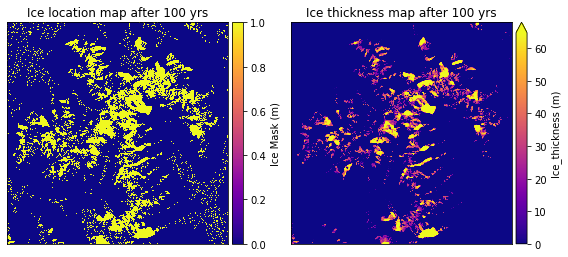

In [18]:
fig,ax=plt.subplots(1,2,figsize=(8,5.5))
#ax.imshow(H_map)
pltlib.iv(I_map,ax=ax[0],cmap='plasma',label='Ice Mask (m)', title='Ice location map after 100 yrs')
pltlib.iv(H_map,ax=ax[1],cmap='plasma',label='Ice_thickness (m)', title='Ice thickness map after 100 yrs')
fig.savefig('Ice_thickness_ice_mask_run2.png',dpi=300)